In [2]:
import numpy as np 
from pathlib import Path
from src import db, fig2, utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rcParams
default_font = 8
fs_title = 10
rcParams["font.family"] = "Arial"
rcParams["savefig.dpi"] = 300
rcParams["axes.spines.top"] = False
rcParams["axes.spines.right"] = False
rcParams["axes.titlelocation"] = "left"
rcParams["axes.titleweight"] = "normal"
rcParams["font.size"] = default_font
trial_type_palette = ['tab:green', 'tab:red', 'tab:cyan', 'tab:orange'] #rew #nrew #rew_test #nrew_test #GI
from IPython.display import clear_output

In [3]:
areas = ["V1", "medial", "lateral", "anterior"]
ctypes = ["exc", "inh"]
corridor_length = 400

dbase = db.get_sessions()
all_first = dbase.query("session == 'all rewarded before'").reset_index(drop=True)
all_last = dbase.query("session == 'all rewarded after'").reset_index(drop=True)

selected_mice = np.array([1,1,1,1,0,0,1], dtype=bool)

In [5]:
correct_incorrect.shape

(5, 4, 4, 2, 2, 400)

In [6]:
all_first.shape

(6, 4, 4, 2, 400)

In [4]:
zscored = True
if zscored == True:
    main_dir = Path("../data/overall")
else:
    main_dir = Path("../data/notz/overall")
correct_incorrect = np.load(main_dir/"last_training"/"correct_incorrect_cds_updated.npy")
all_first = np.load(main_dir/"all_first"/"cod_dirs_0_100.npy")
all_last = np.load(main_dir/"all_last"/"cod_dirs_0_100.npy")
last_day_matched_cds = np.load(main_dir / "last_training" / "cod_dirs_0_100_matched_updated.npy")
last_day_matched_cds = last_day_matched_cds[selected_mice]
correct_incorrect = correct_incorrect[selected_mice,:,:,:,:,:]
all_first = all_first[selected_mice,:,:,:,:]
all_last = all_last[selected_mice,:,:,:,:]
gis_all_first,_,_ = fig2.compute_gi(all_first, 100)
gis_all_last,_,_ = fig2.compute_gi(all_last, 100)
gis_last_m,_,_ = fig2.compute_gi(last_day_matched_cds, 100)
correct = correct_incorrect[:, :, :, :, 0, :]
incorrect = correct_incorrect[:, :, :, :, 1, :]

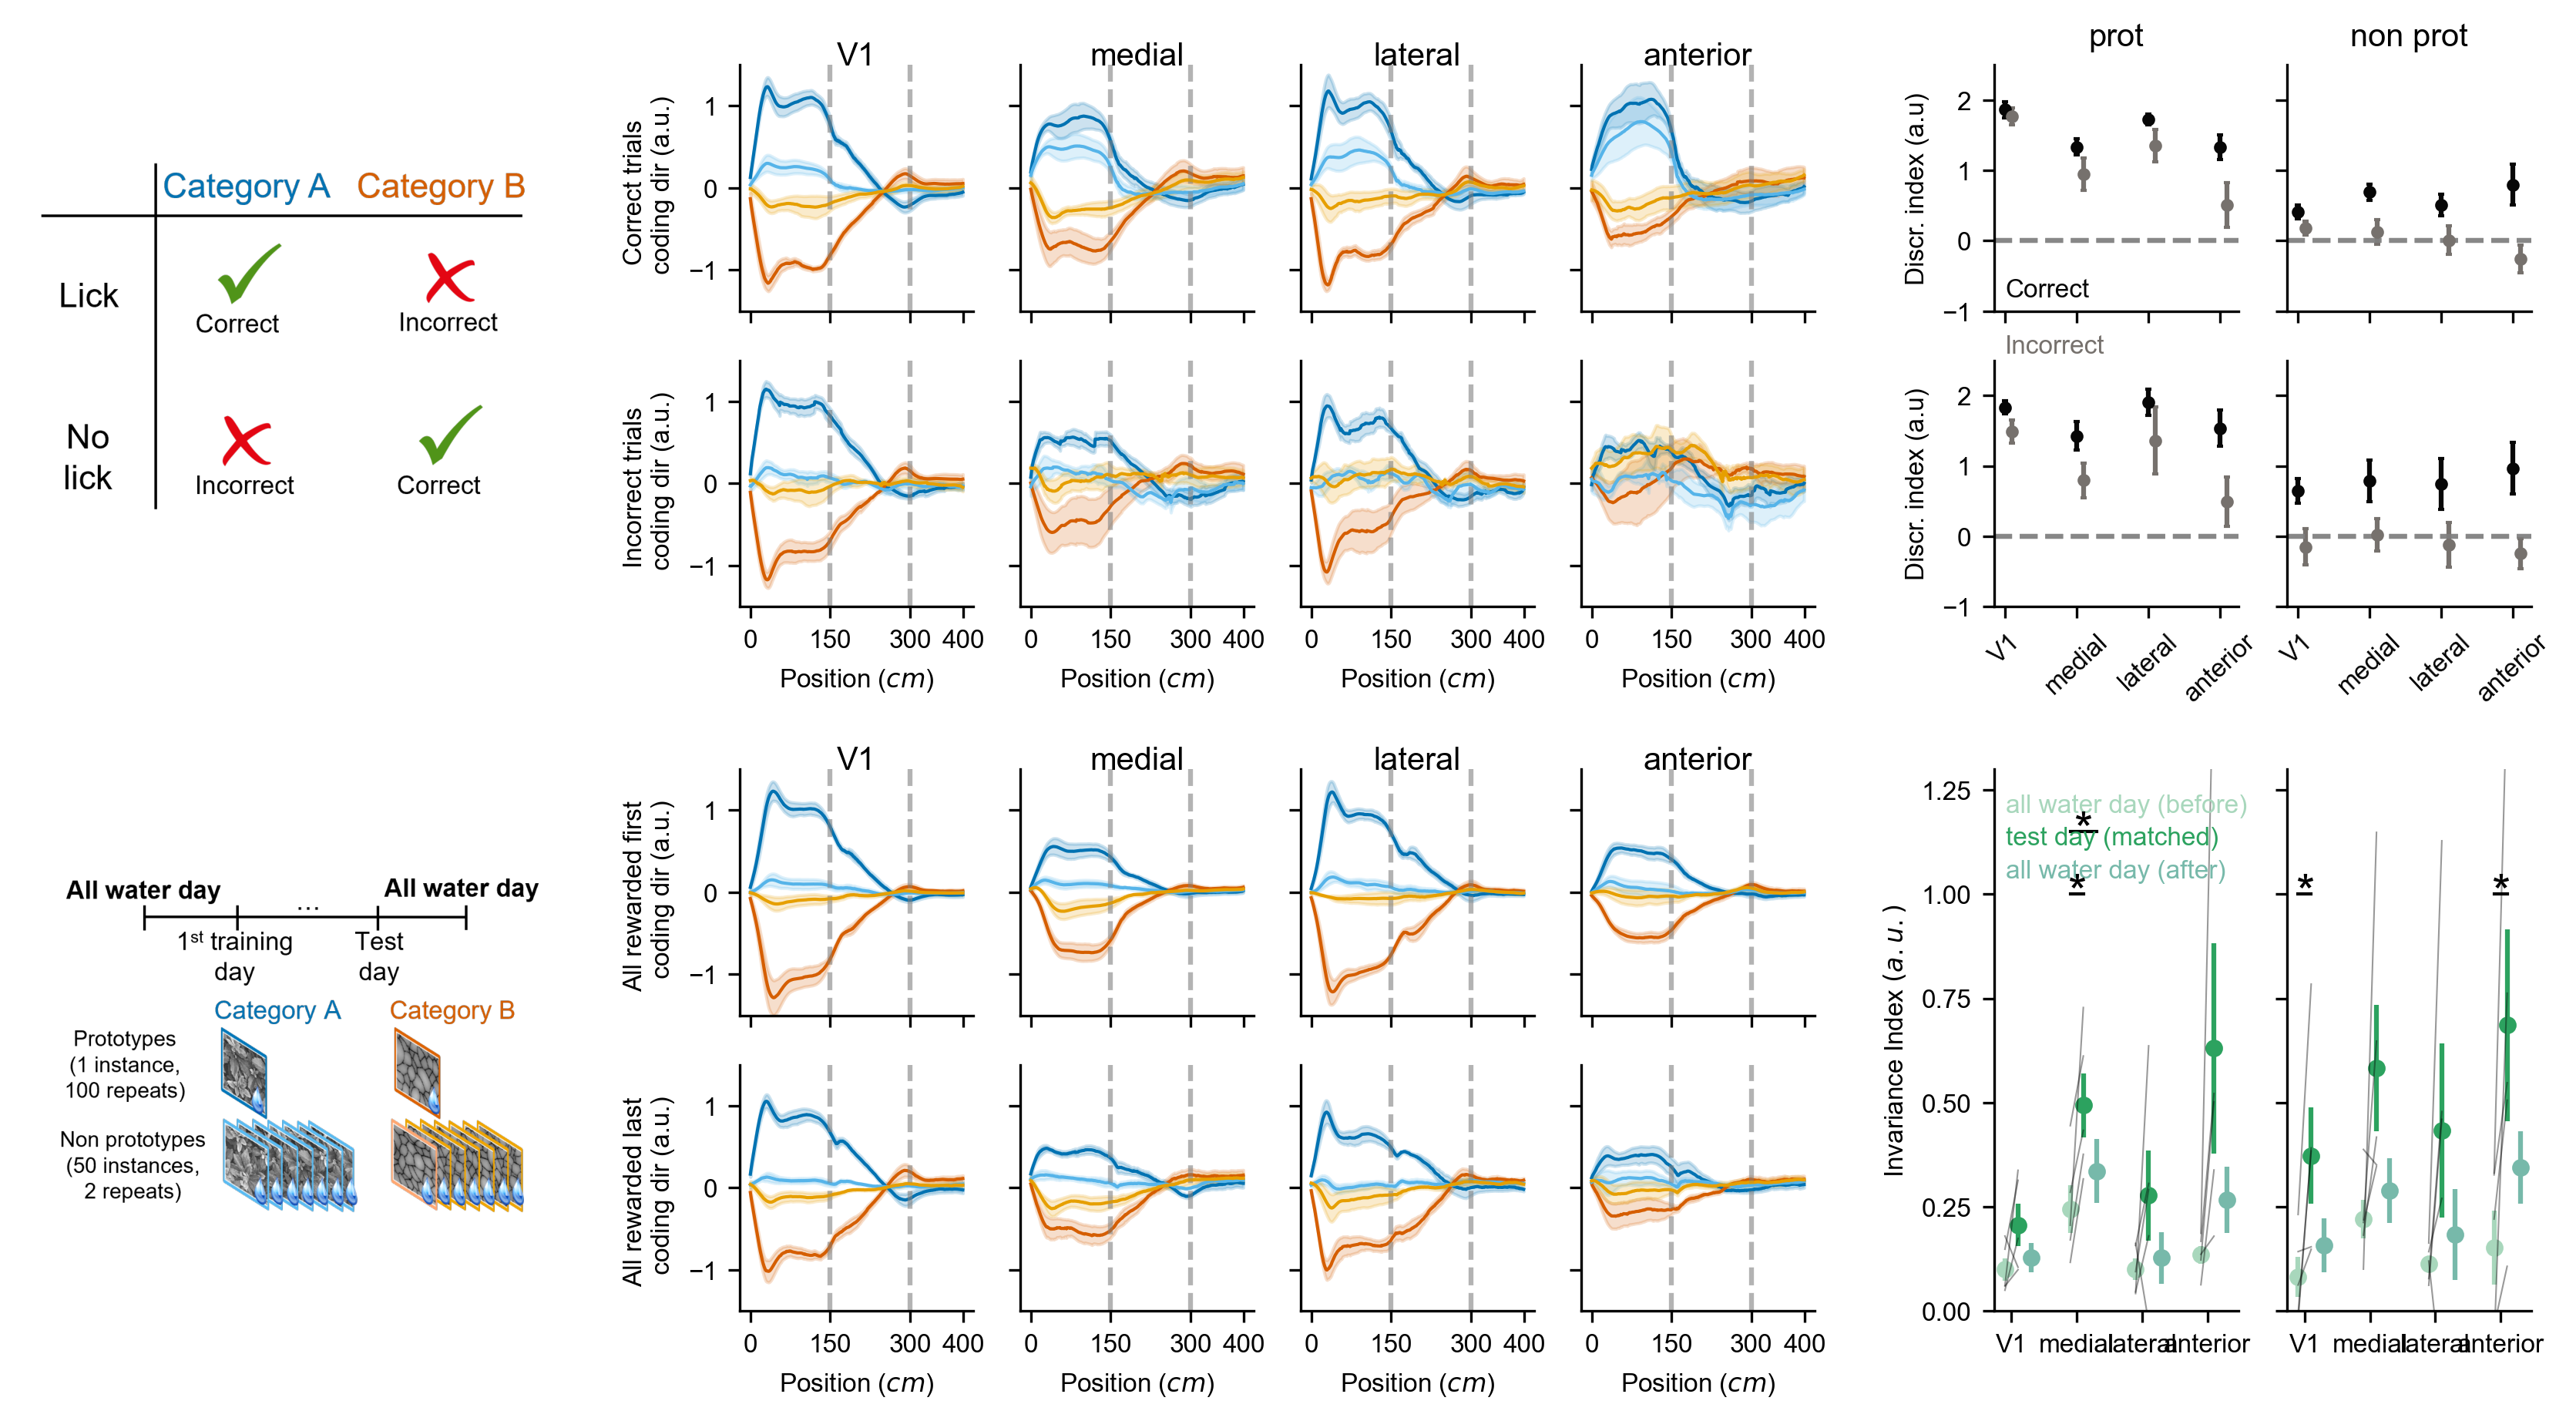

In [5]:
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
fig = plt.figure(figsize=(14, 7), dpi=300)
grid = GridSpec(2, 8, wspace=0.4, hspace=0.3, figure=fig)
row1  = GridSpecFromSubplotSpec(1, 3, subplot_spec=grid[0,:], width_ratios=[.25,.5,.25], wspace=0.25)
row2  = GridSpecFromSubplotSpec(1, 3, subplot_spec=grid[1,:], width_ratios=[.25,.5,.25], wspace=0.25)
c_i_grid = GridSpecFromSubplotSpec(2, 4, subplot_spec=row1[0,1])
c_i_axs = c_i_grid.subplots(sharex=True, sharey=True)
all_grid = GridSpecFromSubplotSpec(2, 4, subplot_spec=row2[0,1])
all_axs = all_grid.subplots(sharex=True, sharey=True)
img0 = fig.add_subplot(row1[0, 0])
di_grid = GridSpecFromSubplotSpec(2, 2, subplot_spec=row1[0,2])
di_axs = di_grid.subplots(sharex=True, sharey=True)
img1 = fig.add_subplot(row2[0, 0])
comp_grid = GridSpecFromSubplotSpec(1, 2, subplot_spec=row2[0,2])
comp_ax = comp_grid.subplots(sharex=True, sharey=True)


for iday, day_response in enumerate([correct, incorrect]):
    for a, area in enumerate(areas):
        c_i_axs[iday,a].set_ylim(-1.5,1.5)
        c_i_axs[0,a].tick_params(labelbottom=False)
        c_i_axs[0,a].set_title(f"{areas[a]}", loc='center', size=fs_title, pad=-0.05)
        c_i_axs[1,a].set_xlabel("Position ($cm$)")
        if iday>0:
            c_i_axs[iday,a].set_xticks([0, 150, 300, 400])
        if a>0:
            c_i_axs[iday,a].tick_params(labelleft=False)
        for ttype in range(4):
            fig2.plot_cds(day_response, ttype, a, 0, c_i_axs[iday,a], references=True)
        
c_i_axs[0,0].set_ylabel('Correct trials \n coding dir (a.u.)')
c_i_axs[1,0].set_ylabel('Incorrect trials \n coding dir (a.u.)')


for iday, day_response in enumerate([all_first, all_last]):
    for a, area in enumerate(areas):
        all_axs[iday,a].set_ylim(-1.5,1.5)
        all_axs[0,a].tick_params(labelbottom=False)
        all_axs[0,a].set_title(f"{areas[a]}", loc='center', size=fs_title, pad=-0.05)
        all_axs[1,a].set_xlabel("Position ($cm$)")
        if iday>0:
            all_axs[iday,a].set_xticks([0, 150, 300, 400])
        if a>0:
            all_axs[iday,a].tick_params(labelleft=False)
        for ttype in range(4):
            fig2.plot_cds(day_response, ttype, a, 0, all_axs[iday,a], references=True)
all_axs[0,0].set_ylabel('All rewarded first \n coding dir (a.u.)')
all_axs[1,0].set_ylabel('All rewarded last \n coding dir (a.u.)')

fig2.plot_gi_comparison_wcontrol(gis_all_first, gis_last_m, gis_all_last, ax=comp_ax)




cell_types = ['Excitatory', 'Inhibitory']
positions = (0, 100)
labels = ['correct', 'incorrect']
from scipy.stats import sem
for ctype in range(2):
    for area in range(4):
        correct_sep_pr, incorrect_sep_pr = fig2.get_di(correct, incorrect, area, ctype, type="prot", pos=positions)
        prot_sep = (correct_sep_pr, incorrect_sep_pr)
        correct_sep_rest, incorrect_sep_rest = fig2.get_di(correct, incorrect, area, ctype, type="non prot", pos=positions)
        test_sep = (correct_sep_rest, incorrect_sep_rest)
        for iff, eff in enumerate([prot_sep, test_sep]):
            c_eff = eff[0].mean()
            c_sem_eff = sem(eff[0])
            i_eff = eff[1].mean()
            i_sem_eff = sem(eff[1])
            di_axs[ctype, iff].errorbar(area, c_eff, yerr=c_sem_eff, fmt='o', capsize=1, markersize=3, color="#070707")
            di_axs[ctype, iff].errorbar(area+.1, i_eff, yerr=i_sem_eff, fmt='o', capsize=1, markersize=3, color= "#76716d")
            di_axs[ctype, iff].set_ylim(-1, 2.5)
            di_axs[0, iff].set_title(f"{['prot', 'non prot'][iff]}", loc='center', size=fs_title)
            di_axs[1, iff].set_xticks(np.arange(4), ['V1', 'medial', 'lateral', 'anterior'], rotation=43)
            di_axs[ctype, iff].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
            di_axs[ctype, 0].set_ylabel(f'Discr. index (a.u)')


            #axes[ctype].set_ylim(-.2, 1)
di_axs[0,0].text(0, -.7, 'Correct', ha='left', va='center', color="#070707")
di_axs[0,0].text(0, -1.5, 'Incorrect', ha='left', va='center', color="#76716d")

fig2.show_image(img0, r"C:\Users\labadmin\Pictures\ci.png")
#fig2.move_axis(img0, hdx=-.05, vdx=0, widthdx=1.5, heightdx=1.1)

fig2.show_image(img1, r"C:\Users\labadmin\Pictures\allrew.png")
#fig2.move_axis(img1, hdx=-.05, vdx=0, widthdx=1.5, heightdx=1.1)

#plt.savefig(r"C:\Users\labadmin\Documents\category-neural\results\figure5v2.pdf", bbox_inches='tight', dpi=300)

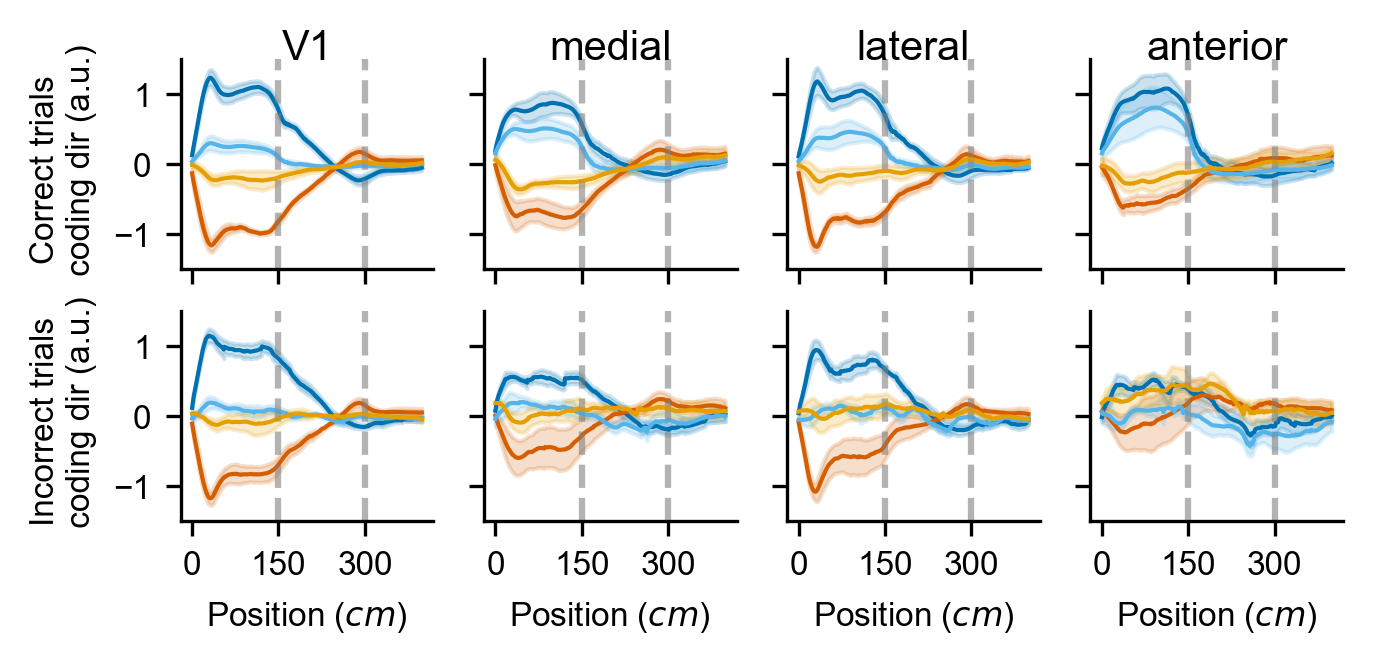

In [17]:
fig, c_i_axs = plt.subplots(2, 4, figsize=(5,2), dpi=300, sharex=True, sharey=True)
for iday, day_response in enumerate([correct, incorrect]):
    for a, area in enumerate(areas):
        c_i_axs[iday,a].set_ylim(-1.5,1.5)
        c_i_axs[0,a].tick_params(labelbottom=False)
        c_i_axs[0,a].set_title(f"{areas[a]}", loc='center', size=fs_title, pad=-0.05)
        c_i_axs[1,a].set_xlabel("Position ($cm$)")
        if iday>0:
            c_i_axs[iday,a].set_xticks([0, 150, 300])
        if a>0:
            c_i_axs[iday,a].tick_params(labelleft=False)
        for ttype in range(4):
            fig2.plot_cds(day_response, ttype, a, 0, c_i_axs[iday,a], references=True)
        
c_i_axs[0,0].set_ylabel('Correct trials \n coding dir (a.u.)')
c_i_axs[1,0].set_ylabel('Incorrect trials \n coding dir (a.u.)')
#plt.savefig(r"C:\Users\labadmin\Pictures\correct_incorrect_coding_directions.svg", dpi=300, bbox_inches='tight')
plt.savefig("C:/Users/labadmin/Pictures/HHMI Meeting Poster"+"/ci_cds.png", dpi=300, bbox_inches='tight')

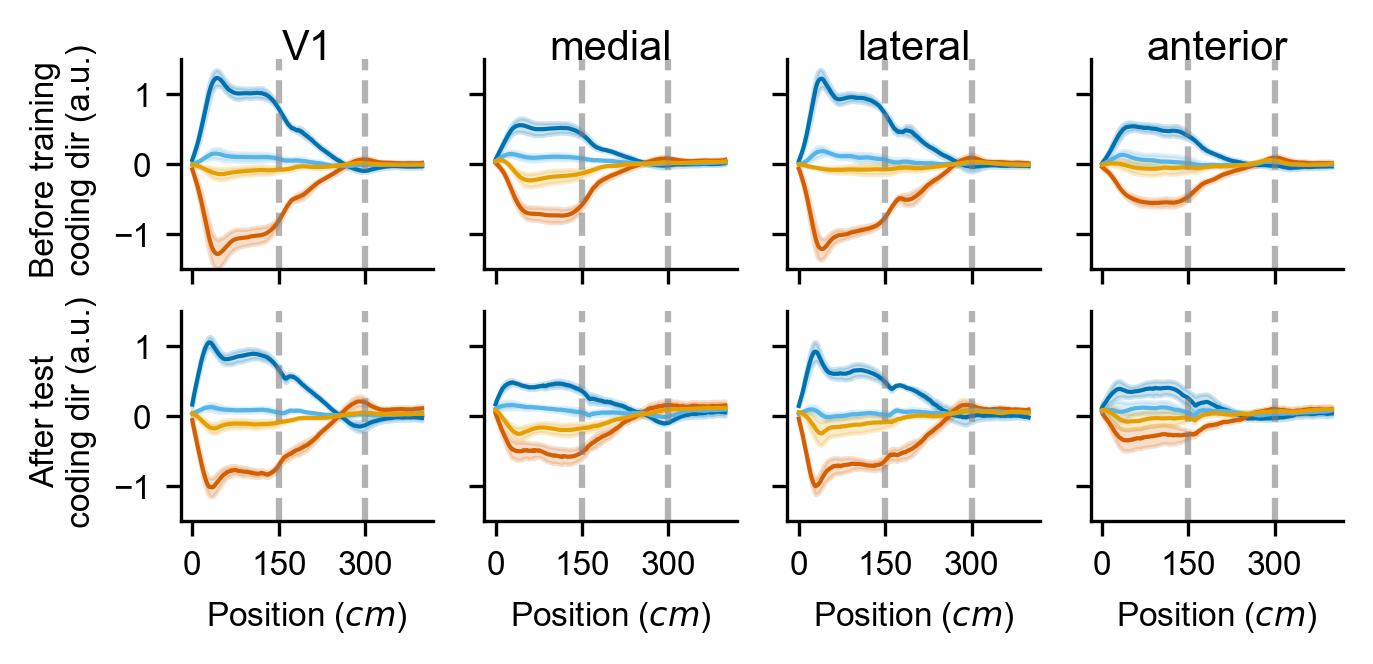

In [18]:
fig, all_axs = plt.subplots(2, 4, figsize=(5,2), dpi=300, sharex=True, sharey=True)
for iday, day_response in enumerate([all_first, all_last]):
    for a, area in enumerate(areas):
        all_axs[iday,a].set_ylim(-1.5,1.5)
        all_axs[0,a].tick_params(labelbottom=False)
        all_axs[0,a].set_title(f"{areas[a]}", loc='center', size=fs_title, pad=-0.05)
        all_axs[1,a].set_xlabel("Position ($cm$)")
        if iday>0:
            all_axs[iday,a].set_xticks([0, 150, 300])
        if a>0:
            all_axs[iday,a].tick_params(labelleft=False)
        for ttype in range(4):
            fig2.plot_cds(day_response, ttype, a, 0, all_axs[iday,a], references=True)
all_axs[0,0].set_ylabel('Before training \n coding dir (a.u.)')
all_axs[1,0].set_ylabel('After test \n coding dir (a.u.)')
#plt.savefig(r"C:\Users\labadmin\Pictures\allwater_coding_directions.svg", dpi=300, bbox_inches='tight')
plt.savefig("C:/Users/labadmin/Pictures/HHMI Meeting Poster"+"/allwater_cds.png", dpi=300, bbox_inches='tight')

In [18]:
correct_sep_rest, incorrect_sep_rest = fig2.get_di(correct, incorrect, 3, 0, type="non prot", pos=positions)
incorrect_sep_rest

array([-0.32019955, -0.94746102,  0.14804595, -0.24717617,  0.0905178 ])

In [107]:
from scipy.stats import ttest_1samp
# test if incorrect_sep_rest is significantly different from zero
for a, area in enumerate(areas):
    print(area)
    correct_sep_prot, incorrect_sep_prot = fig2.get_di(correct, incorrect, a, 0, type="prot", pos=positions)
    correct_sep_rest, incorrect_sep_rest = fig2.get_di(correct, incorrect, a, 0, type="non prot", pos=positions)
    print(ttest_1samp(incorrect_sep_prot, 0, alternative='two-sided'), ttest_1samp(incorrect_sep_rest, 0, alternative='two-sided'))

V1
Ttest_1sampResult(statistic=15.119085791286242, pvalue=0.00011155474681791897) Ttest_1sampResult(statistic=1.780304672808093, pvalue=0.1496311417701928)
medial
Ttest_1sampResult(statistic=4.072387892822444, pvalue=0.015193102166827437) Ttest_1sampResult(statistic=0.7030272915121522, pvalue=0.5208013871884056)
lateral
Ttest_1sampResult(statistic=5.876717761946014, pvalue=0.004188950355323479) Ttest_1sampResult(statistic=0.04741062795034814, pvalue=0.9644586704800417)
anterior
Ttest_1sampResult(statistic=1.6168376189430536, pvalue=0.18122022231424936) Ttest_1sampResult(statistic=-1.3045943327064444, pvalue=0.26202758559410544)


In [109]:
from scipy.stats import ttest_1samp
# test if incorrect_sep_rest is significantly different from zero
for a, area in enumerate(areas):
    print(area)
    correct_sep_prot, incorrect_sep_prot = fig2.get_di(correct, incorrect, a, 1, type="prot", pos=positions)
    correct_sep_rest, incorrect_sep_rest = fig2.get_di(correct, incorrect, a, 1, type="non prot", pos=positions)
    print(ttest_1samp(correct_sep_prot, 0, alternative='two-sided'), ttest_1samp(correct_sep_rest, 0, alternative='two-sided'))

V1
Ttest_1sampResult(statistic=18.94370092852228, pvalue=4.5736903727096484e-05) Ttest_1sampResult(statistic=3.721524614365897, pvalue=0.020447320822843264)
medial
Ttest_1sampResult(statistic=7.14628799782809, pvalue=0.002028432433415274) Ttest_1sampResult(statistic=2.6893362066289836, pvalue=0.054695719099692175)
lateral
Ttest_1sampResult(statistic=10.496923863869098, pvalue=0.00046566434288431867) Ttest_1sampResult(statistic=2.0434811875913557, pvalue=0.11050553599733051)
anterior
Ttest_1sampResult(statistic=5.978835842378278, pvalue=0.003933133127211719) Ttest_1sampResult(statistic=2.6192406074578325, pvalue=0.05884624252998769)


In [44]:
a,_,_ = fig2.compute_gi(incorrect, 100)
a.shape

(5, 4, 2)

In [ ]:
fig2.compute_gi(incorrect, 100)

In [48]:
a

array([[[ 5.26241040e-02, -2.98680681e-01],
        [-7.45958520e-02,  5.13358390e-01],
        [-5.76882627e-02, -2.65553477e-01],
        [-1.17040240e+00, -4.91994814e+00]],

       [[-6.32919266e-02, -7.29960449e-01],
        [-1.25967291e+00, -9.07646717e+00],
        [-1.07967228e+00, -1.38892872e+02],
        [-1.62525535e+00, -1.17275829e+00]],

       [[ 2.13046280e-01,  1.64592668e-01],
        [ 3.36325007e-01,  2.18700471e-01],
        [ 3.35063723e-01,  2.41594571e-01],
        [ 1.43520738e-01,  1.21279692e-01]],

       [[ 3.85416713e-02, -2.77431681e-01],
        [ 3.91963969e-01,  2.10123924e-01],
        [-2.07697403e-01, -4.06258882e-02],
        [-3.80775576e-01, -3.55506440e-01]],

       [[ 2.82993211e-01,  3.85318828e-01],
        [ 2.05294286e-01,  2.37825658e-01],
        [ 3.13546327e-01,  3.63449187e-01],
        [ 7.70669978e-02,  4.22201533e-01]]])

In [50]:
incorrect_gis, _, _ = fig2.compute_gi(incorrect, 100)
mean = np.mean(incorrect_gis[:, a, ctp], axis=0)
sem_ = sem(incorrect_gis[:, a, ctp], axis=0)

NameError: name 'ctp' is not defined

In [65]:
prot.shape

(5, 4, 2)

In [146]:
second_gi[:,2,1]

array([-2.65553477e-01, -1.38892872e+02,  2.41594571e-01, -4.06258882e-02,
        3.63449187e-01])

Text(0, -0.65, 'Incorrect trials')

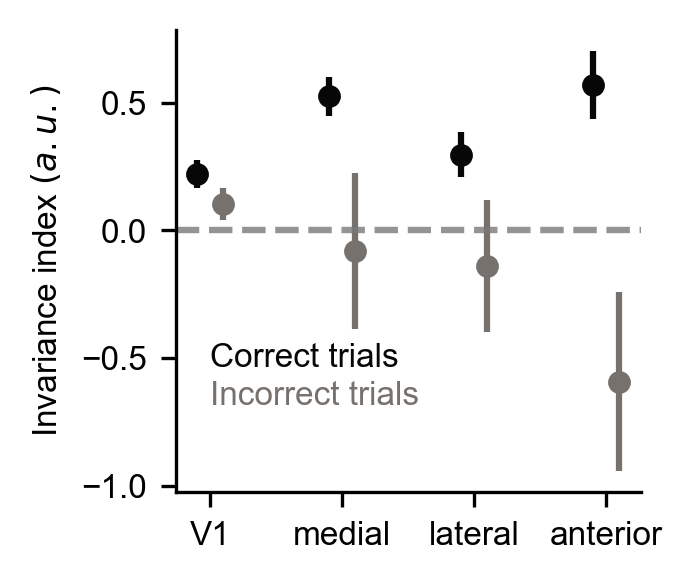

In [ ]:
from scipy.stats import ttest_rel, sem
fig, ax = plt.subplots(1,1, figsize=(2,2), dpi=300, sharey=True)
colors = ["#070707","#76716d"]
offset = [-0.1, 0.1, 0.3] # offset for the first, second and control GI
labels = ['first day', 'last day (behavior matched)', 'last day (all trials)']
first_gi,_,_= fig2.compute_gi(correct, 100)
second_gi,prot,noprot = fig2.compute_gi(incorrect, 100)
for i_gi, gi in enumerate([first_gi, second_gi]):
    for a in range(4):
        mean = np.mean(gi[:, a, 0], axis=0)
        sem_ = sem(gi[:, a, 0], axis=0)
        ax.scatter(a+offset[i_gi], mean, color=colors[i_gi], alpha=1, s=20)
        ax.errorbar(a+offset[i_gi], mean, yerr=sem_, color=colors[i_gi], alpha=1)
        ax.set_xticks(np.arange(4), ['V1', 'medial', 'lateral', 'anterior'])
        ax.axhline(y=0, color='gray', linestyle='--', alpha=0.2)
        
            
ax.set_ylabel('Invariance index $(a.u.)$')
ax.text(0, -.5, 'Correct trials', ha='left', va='center', color=colors[0])
ax.text(0, -.65, 'Incorrect trials', ha='left', va='center', color=colors[1])

0.09764732219967191
0.08605817586577179
0.11405450107583241
0.033963612595055266


Text(0, -0.65, 'Incorrect trials')

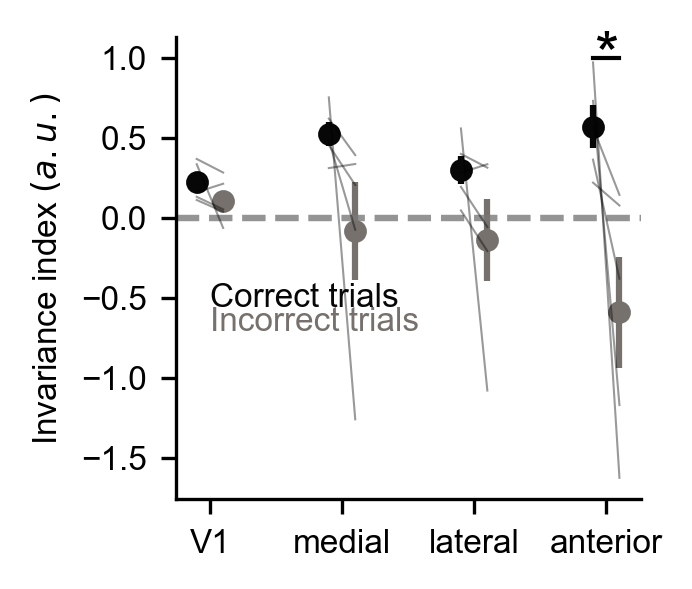

In [12]:
from matplotlib.lines import Line2D
def significance(pval):
    if  pval >= .05:
        sig = ''
    elif (pval < .05) and (pval >= .01):
        sig = '*'
    elif (pval < .01) and (pval >= .001):
        sig = '**'
    elif (pval < .001) and (pval >= .0001):
        sig = '***'
    else:
        sig = '****'
    return sig
from scipy.stats import ttest_rel, sem
fig, ax = plt.subplots(1,1, figsize=(2,2), dpi=300, sharey=True)
colors = ["#070707","#76716d"]
offset = [-0.1, 0.1, 0.3] # offset for the first, second and control GI
labels = ['first day', 'last day (behavior matched)', 'last day (all trials)']
first_gi,_,_= fig2.compute_gi(correct, 100)
second_gi,prot,noprot = fig2.compute_gi(incorrect, 100)
for i_gi, gi in enumerate([first_gi, second_gi]):
    for a in range(4):
        mean = np.mean(gi[:, a, 0], axis=0)
        sem_ = sem(gi[:, a, 0], axis=0)
        ax.scatter(a+offset[i_gi], mean, color=colors[i_gi], alpha=1, s=20)
        ax.errorbar(a+offset[i_gi], mean, yerr=sem_, color=colors[i_gi], alpha=1)
        ax.set_xticks(np.arange(4), ['V1', 'medial', 'lateral', 'anterior'])
        ax.axhline(y=0, color='gray', linestyle='--', alpha=0.2)
for a in range(4):
    day_one_r = first_gi[:, a, 0]
    day_two_r = second_gi[:, a, 0]
    t, p = ttest_rel(day_two_r, day_one_r, alternative='less')
    print(p)
    p_t = significance(p)
    if p<.05:
        ax.text(a, 1, p_t, ha='center', va='center', color='k', fontsize=15, transform=ax.transData)
        # a line between one category and the other
        line = Line2D([a-.1, a+.1], [1, 1], color='k', linewidth=1, alpha=1)
        ax.add_line(line)
    for m in range(first_gi.shape[0]):
        ax.plot([a-.1, a+.1], [day_one_r[m], day_two_r[m]], color='k', linewidth=.5, alpha=0.4)
ax.set_ylabel('Invariance index $(a.u.)$')
ax.text(0, -.5, 'Correct trials', ha='left', va='center', color=colors[0])
ax.text(0, -.65, 'Incorrect trials', ha='left', va='center', color=colors[1])
#plt.savefig(r"C:\Users\labadmin\Pictures\ci_gis.svg", dpi=300, bbox_inches='tight')

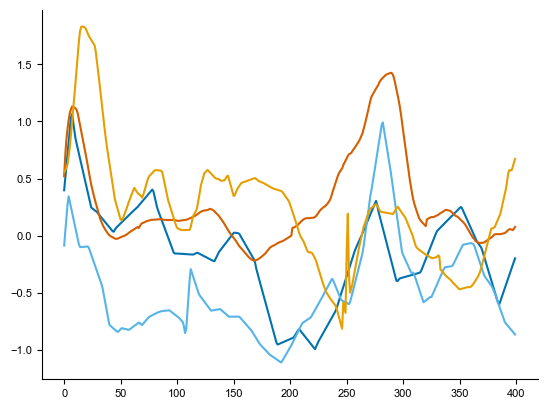

In [152]:
color = ['#0072B2', '#D55E00', '#56B4E9', '#E69F00']
for t in range(4):
    plt.plot(incorrect[1,t,2, 1,:], color=color[t])

In [167]:
(incorrect[1,0,:, 1,:100].mean(-1) - incorrect[1,1,:, 1,:100].mean(-1))

array([ 1.08791446,  0.09853808, -0.00902621, -0.6942655 ])

In [168]:
(incorrect[1,2,:, 1,:100].mean(-1) - incorrect[1,3,:, 1,:100].mean(-1))

array([-0.79413453, -0.89437763, -1.25367658, -0.81420562])

In [158]:
(incorrect[1,2,2, 1,:100].mean(-1) - incorrect[1,3,2, 1,:100].mean(-1))

-1.2536765766961948

In [161]:
-1.2536765766961948 / -.009

139.29739741068832

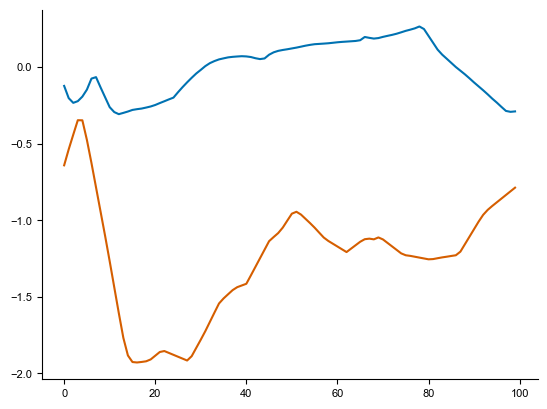

In [156]:
color = ['#0072B2', '#D55E00', '#56B4E9', '#E69F00']
plt.plot(incorrect[1,0,2, 1,:100] - incorrect[1,1,2, 1,:100], color=color[0])
plt.plot(incorrect[1,2,2, 1,:100] - incorrect[1,3,2, 1,:100], color=color[1])

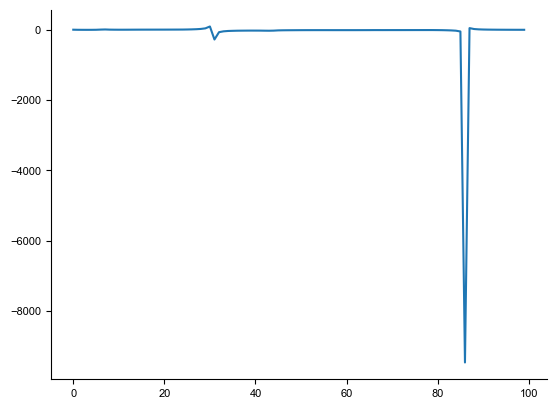

In [155]:
plt.plot((incorrect[1,2,2, 1,:100] - incorrect[1,3,2, 1,:100]) / (incorrect[1,0,2, 1,:100] - incorrect[1,1,2, 1,:100]) )

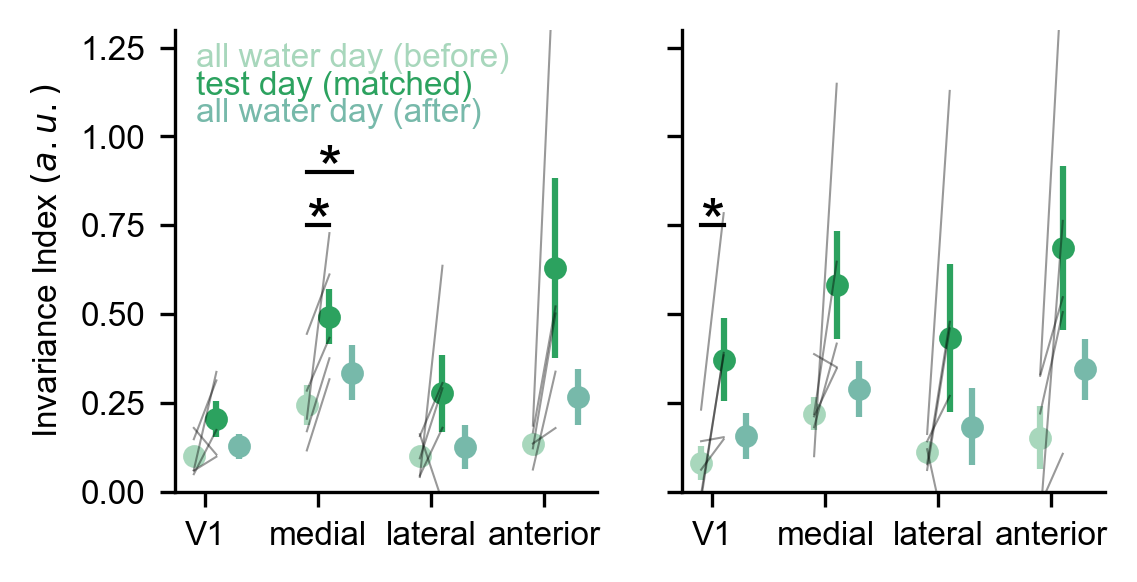

In [16]:
fig, comp_ax = plt.subplots(1,2, figsize=(4,2), dpi=300, sharey=True)
fig2.plot_gi_comparison_wcontrol(gis_all_first, gis_last_m, gis_all_last, ax=comp_ax)
#plt.savefig(r"C:\Users\labadmin\Pictures\gi_comparison_waterdays.svg", dpi=300, bbox_inches='tight')

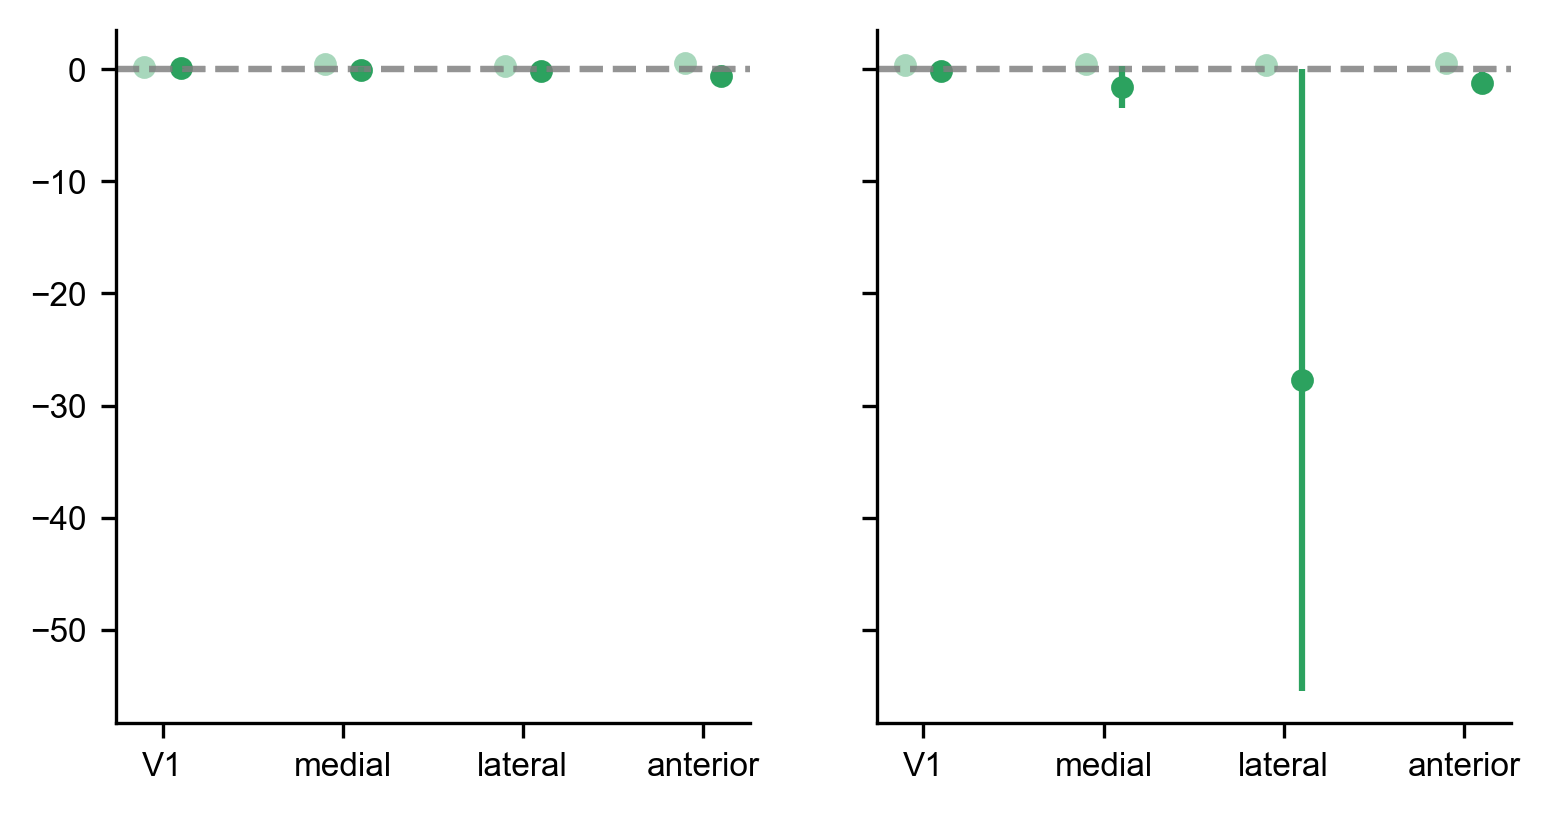

In [95]:
from scipy.stats import ttest_rel, sem
fig, ax = plt.subplots(1,2, figsize=(6,3), dpi=300, sharey=True)
colors = ["#a8d7bc",'#2ca25f',"#77b9aa"]
offset = [-0.1, 0.1, 0.3] # offset for the first, second and control GI
labels = ['first day', 'last day (behavior matched)', 'last day (all trials)']
first_gi,_,_= fig2.compute_gi(correct, 100)
second_gi,prot,noprot = fig2.compute_gi(incorrect, 100)
for i_gi, gi in enumerate([first_gi, second_gi]):
    for a in range(4):
        for ctp in range(2):
            mean = np.mean(gi[:, a, ctp], axis=0)
            sem_ = sem(gi[:, a, ctp], axis=0)
            ax[ctp].scatter(a+offset[i_gi], mean, color=colors[i_gi], alpha=1, s=20)
            ax[ctp].errorbar(a+offset[i_gi], mean, yerr=sem_, color=colors[i_gi], alpha=1)
            ax[ctp].set_xticks(np.arange(4), ['V1', 'medial', 'lateral', 'anterior'])
            ax[ctp].axhline(y=0, color='gray', linestyle='--', alpha=0.2)

Figure-relative coordinates: [0.07715893 0.87841612]
Figure-relative coordinates: [0.29949534 0.87847826]
Figure-relative coordinates: [0.29949534 0.69586957]
Figure-relative coordinates: [0.69618506 0.87847826]
Figure-relative coordinates: [0.69618506 0.69586957]
Figure-relative coordinates: [0.07715893 0.44312893]
Figure-relative coordinates: [0.29949534 0.44326087]
Figure-relative coordinates: [0.29949534 0.26065217]
Figure-relative coordinates: [0.69618506 0.44326087]
Figure-relative coordinates: [0.69618506 0.26065217]


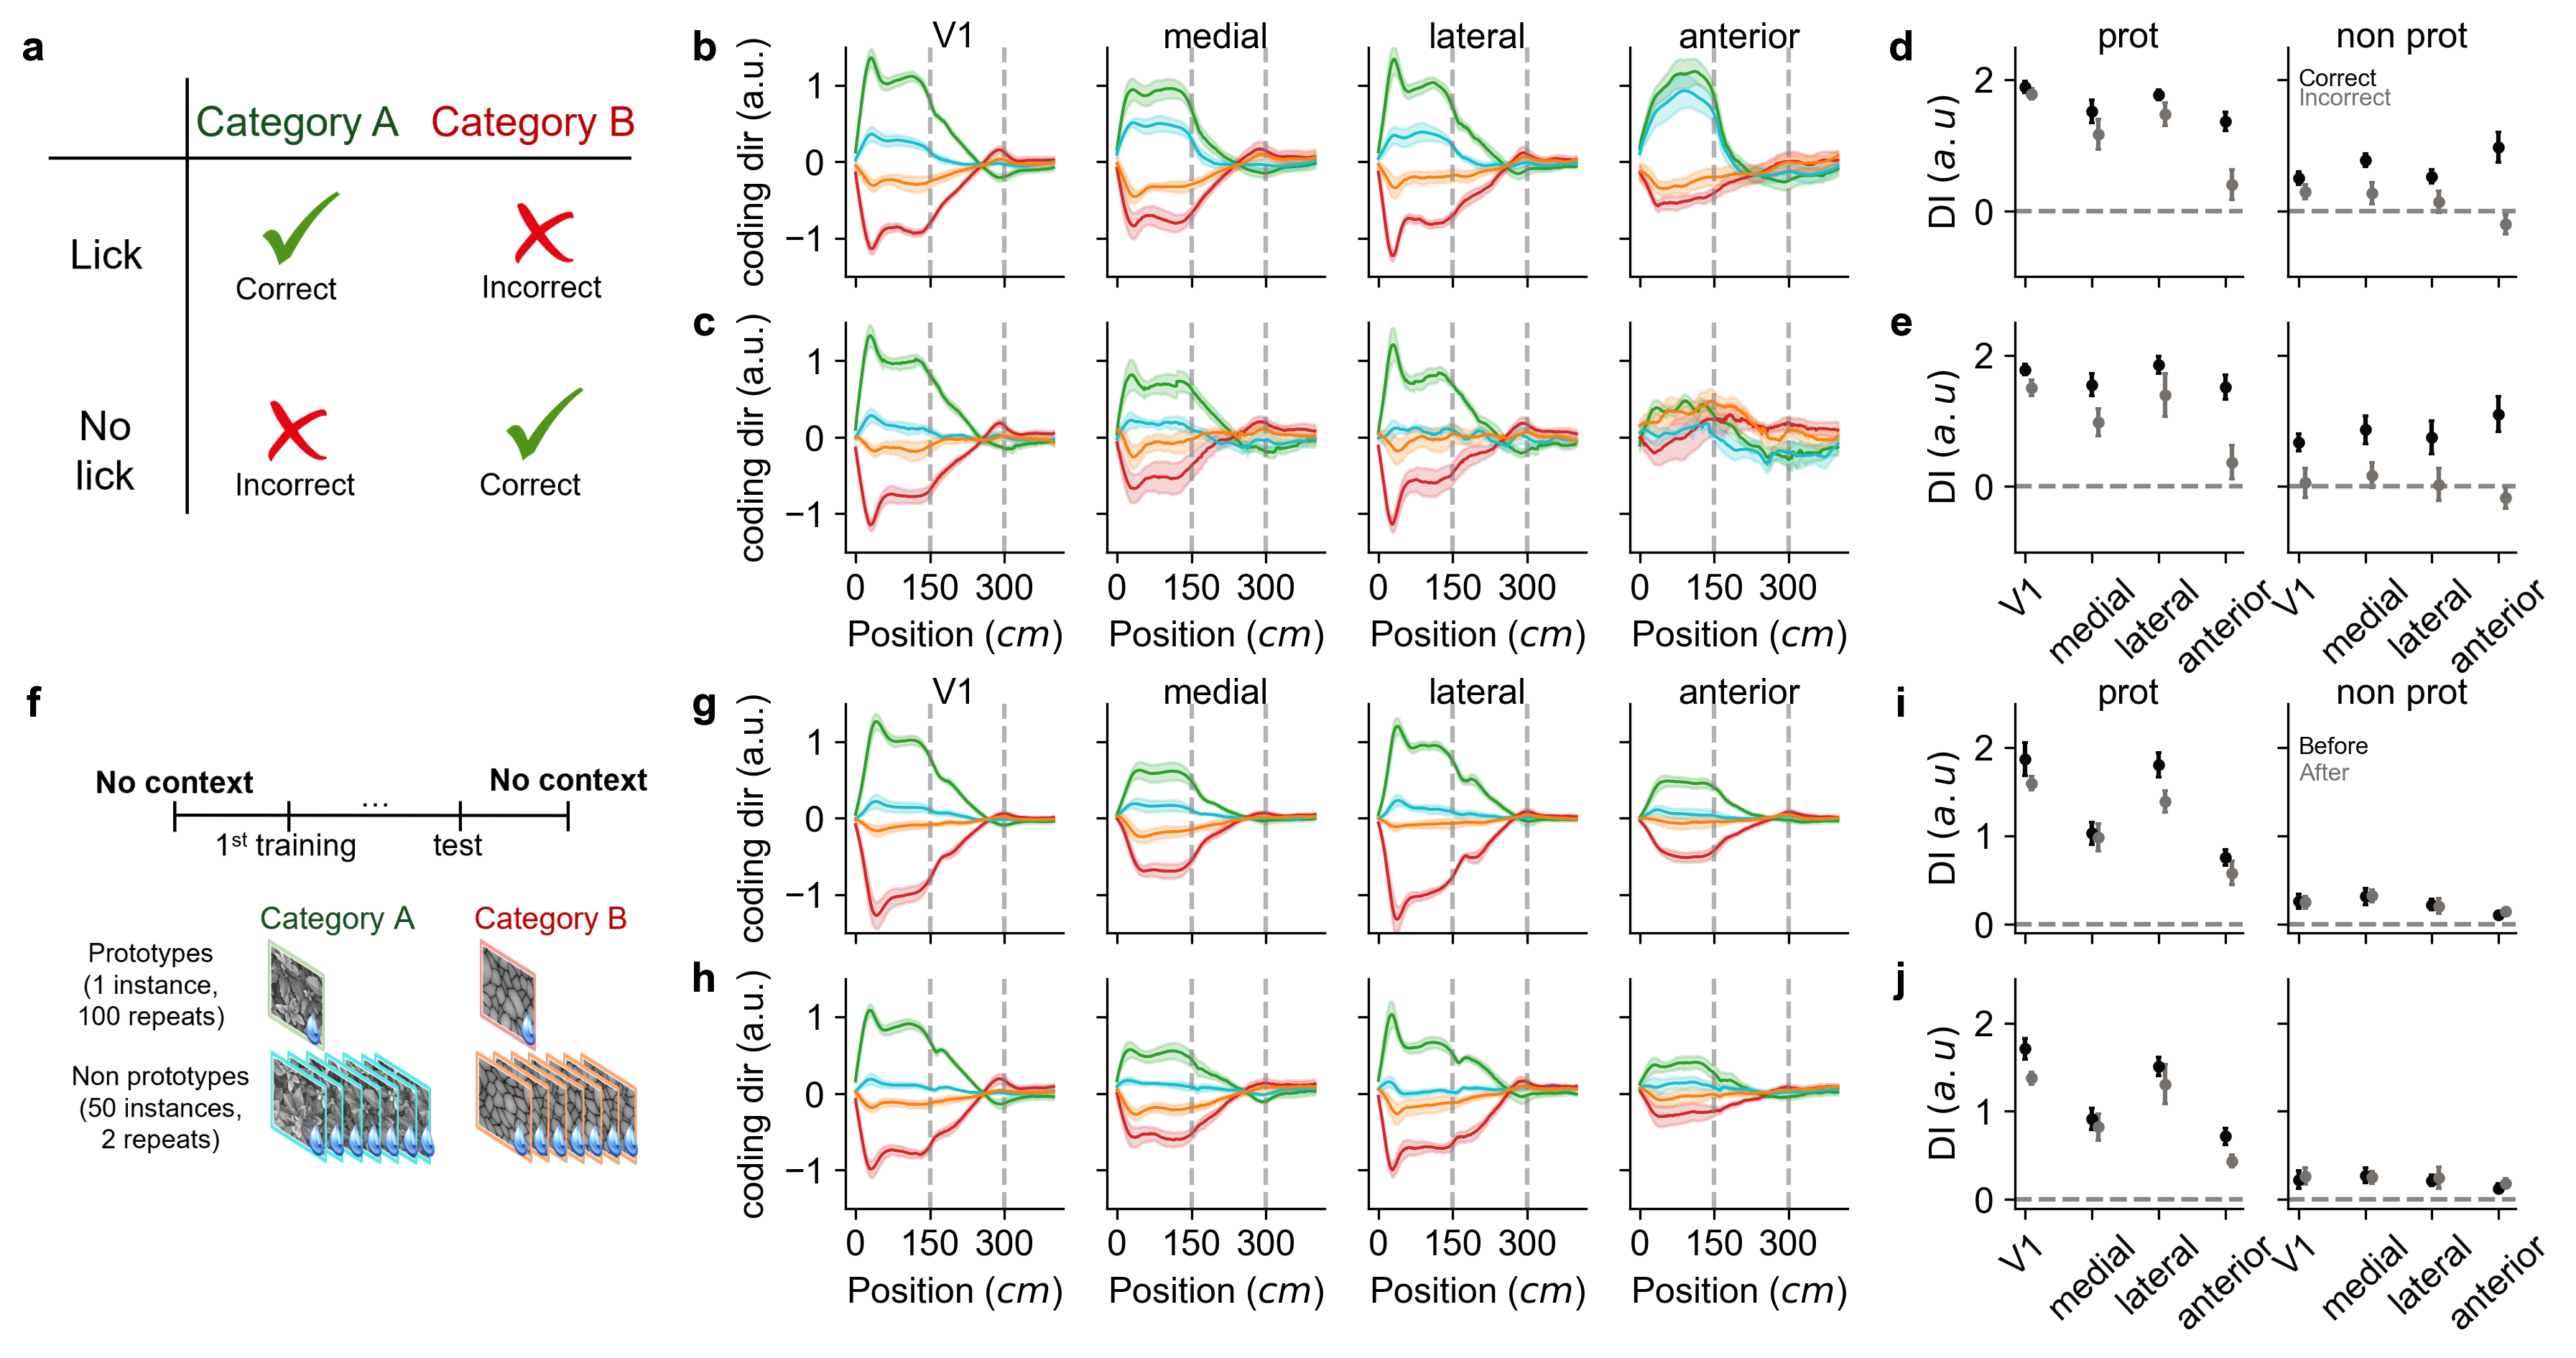

In [32]:
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
fig = plt.figure(figsize=(14, 7), dpi=300)
grid = GridSpec(2, 8, wspace=0.4, hspace=0.3, figure=fig)
row1  = GridSpecFromSubplotSpec(1, 3, subplot_spec=grid[0,:], width_ratios=[.25,.5,.25], wspace=0.25)
row2  = GridSpecFromSubplotSpec(1, 3, subplot_spec=grid[1,:], width_ratios=[.25,.5,.25], wspace=0.25)
c_i_grid = GridSpecFromSubplotSpec(2, 4, subplot_spec=row1[0,1])
c_i_axs = c_i_grid.subplots(sharex=True, sharey=True)
all_grid = GridSpecFromSubplotSpec(2, 4, subplot_spec=row2[0,1])
all_axs = all_grid.subplots(sharex=True, sharey=True)
img0 = fig.add_subplot(row1[0, 0])
di_grid = GridSpecFromSubplotSpec(2, 2, subplot_spec=row1[0,2])
di_axs = di_grid.subplots(sharex=True, sharey=True)
img1 = fig.add_subplot(row2[0, 0])
comp_grid = GridSpecFromSubplotSpec(2, 2, subplot_spec=row2[0,2])
comp_ax = comp_grid.subplots(sharex=True, sharey=True)


for iday, day_response in enumerate([correct, incorrect]):
    for a, area in enumerate(areas):
        c_i_axs[iday,a].set_ylim(-1.5,1.5)
        c_i_axs[0,a].tick_params(labelbottom=False)
        c_i_axs[0,a].set_title(f"{areas[a]}", loc='center', size=12, pad=-0.05)
        c_i_axs[1,a].set_xlabel("Position ($cm$)")
        for ttype in range(4):
            fig2.plot_cds(day_response, ttype, a, 0, c_i_axs[iday,a], references=True)
        if iday>0:
            c_i_axs[iday,a].set_xticks([0, 150, 300])
c_i_axs[0,0].set_ylabel('coding dir (a.u.)')
c_i_axs[1,0].set_ylabel('coding dir (a.u.)')


for iday, day_response in enumerate([all_first, all_last]):
    for a, area in enumerate(areas):
        all_axs[iday,a].set_ylim(-1.5,1.5)
        all_axs[0,a].tick_params(labelbottom=False)
        all_axs[0,a].set_title(f"{areas[a]}", loc='center', size=12, pad=-0.05)
        all_axs[1,a].set_xlabel("Position ($cm$)")
        for ttype in range(4):
            fig2.plot_cds(day_response, ttype, a, 0, all_axs[iday,a], references=True)
        if iday>0:
            all_axs[iday,a].set_xticks([0, 150, 300])
all_axs[0,0].set_ylabel('coding dir (a.u.)')
all_axs[1,0].set_ylabel('coding dir (a.u.)')

#fig2.plot_gi_comparison(gis_all_first, gis_all_last, labels=("all rewarded first", "all rewarded last"), ax=comp_ax)

cell_types = ['Excitatory', 'Inhibitory']
positions = (0, 100)
from scipy.stats import sem
for ctype in range(2):
    for area in range(4):
        correct_sep_pr, incorrect_sep_pr = fig2.get_di(all_first, all_last, area, ctype, type="prot", pos=positions)
        prot_sep = (correct_sep_pr, incorrect_sep_pr)
        correct_sep_rest, incorrect_sep_rest = fig2.get_di(all_first, all_last, area, ctype, type="non prot", pos=positions)
        test_sep = (correct_sep_rest, incorrect_sep_rest)
        for iff, eff in enumerate([prot_sep, test_sep]):
            c_eff = eff[0].mean()
            c_sem_eff = sem(eff[0])
            i_eff = eff[1].mean()
            i_sem_eff = sem(eff[1])
            comp_ax[ctype, iff].errorbar(area, c_eff, yerr=c_sem_eff, fmt='o', capsize=1, markersize=3, color="#070707")
            comp_ax[ctype, iff].errorbar(area+.1, i_eff, yerr=i_sem_eff, fmt='o', capsize=1, markersize=3, color= "#76716d")
            comp_ax[ctype, iff].set_ylim(-.1, 2.5)
            comp_ax[0, iff].set_title(f"{['prot', 'non prot'][iff]}", loc='center', size=12, pad=-0.05)
            comp_ax[1, iff].set_xticks(np.arange(4), ['V1', 'medial', 'lateral', 'anterior'], rotation=43)
            comp_ax[ctype, iff].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
            comp_ax[ctype, 0].set_ylabel(f'DI $(a.u)$')
comp_ax[0,1].text(0, 2, 'Before', ha='left', va='center', color="#070707", size=8)
comp_ax[0,1].text(0, 1.7, 'After', ha='left', va='center', color="#76716d", size=8)


for ctype in range(2):
    for area in range(4):
        correct_sep_pr, incorrect_sep_pr = fig2.get_di(correct, incorrect, area, ctype, type="prot", pos=positions)
        prot_sep = (correct_sep_pr, incorrect_sep_pr)
        correct_sep_rest, incorrect_sep_rest = fig2.get_di(correct, incorrect, area, ctype, type="non prot", pos=positions)
        test_sep = (correct_sep_rest, incorrect_sep_rest)
        for iff, eff in enumerate([prot_sep, test_sep]):
            c_eff = eff[0].mean()
            c_sem_eff = sem(eff[0])
            i_eff = eff[1].mean()
            i_sem_eff = sem(eff[1])
            di_axs[ctype, iff].errorbar(area, c_eff, yerr=c_sem_eff, fmt='o', capsize=1, markersize=3, color="#070707")
            di_axs[ctype, iff].errorbar(area+.1, i_eff, yerr=i_sem_eff, fmt='o', capsize=1, markersize=3, color= "#76716d")
            di_axs[ctype, iff].set_ylim(-1, 2.5)
            di_axs[0, iff].set_title(f"{['prot', 'non prot'][iff]}", loc='center', size=12, pad=-0.05)
            di_axs[1, iff].set_xticks(np.arange(4), ['V1', 'medial', 'lateral', 'anterior'], rotation=43)
            di_axs[ctype, iff].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
            di_axs[ctype, 0].set_ylabel(f'DI $(a.u)$')


            #axes[ctype].set_ylim(-.2, 1)
di_axs[0,1].text(0, 2, 'Correct', ha='left', va='center', color="#070707", size=8)
di_axs[0,1].text(0, 1.7, 'Incorrect', ha='left', va='center', color="#76716d", size=8)

fig2.show_image(img0, r"C:\Users\labadmin\Pictures\ci.png")
fig2.move_axis(img0, hdx=-.05, vdx=-.035, widthdx=1.3, heightdx=1.3)

fig2.show_image(img1, r"C:\Users\labadmin\Pictures\allrew.png")
fig2.move_axis(img1, hdx=-.05, vdx=-.035, widthdx=1.3, heightdx=1.3)
fig2.add_panel_label(img0, 'a', x=0.01, y=1.0635, size=fs_title, weight='bold')
fig2.add_panel_label(c_i_axs[0,0], 'b', x=-0.65, y=0.99, size=fs_title, weight='bold')
fig2.add_panel_label(c_i_axs[1,0], 'c', x=-0.65, y=0.99, size=fs_title, weight='bold')
fig2.add_panel_label(di_axs[0,0], 'd', x=-0.5, y=0.99, size=fs_title, weight='bold')
fig2.add_panel_label(di_axs[1,0], 'e', x=-0.5, y=0.99, size=fs_title, weight='bold')
fig2.add_panel_label(img1, 'f', x=0.01, y=1.1056, size=fs_title, weight='bold')
fig2.add_panel_label(all_axs[0,0], 'g', x=-0.65, y=0.99, size=fs_title, weight='bold')
fig2.add_panel_label(all_axs[1,0], 'h', x=-0.65, y=0.99, size=fs_title, weight='bold')
fig2.add_panel_label(comp_ax[0,0], 'i', x=-0.5, y=0.99, size=fs_title, weight='bold')
fig2.add_panel_label(comp_ax[1,0], 'j', x=-0.5, y=0.99, size=fs_title, weight='bold')
plt.savefig(r"C:\Users\labadmin\Documents\category-neural\results\figure5.pdf", bbox_inches='tight', dpi=300)

In [6]:
# Suppose you have a Text object
txt = di_axs[0, 0].text(0.5, 0.5, "Example", transform=di_axs[0, 0].transAxes)

# Get its position in axes coordinates
x_axes, y_axes = txt.get_position()

# Transform to figure coordinates
display_coord = di_axs[0, 0].transAxes.transform((x_axes, y_axes))
figure_coord = fig.transFigure.inverted().transform(display_coord)

print("Figure-relative coordinates:", figure_coord)

Figure-relative coordinates: [0.77167208 0.80391304]


In [7]:
grouped = pd.read_csv(r"C:\Users\labadmin\Documents\oneshot-neural\results\invariancebygroup_arealayer.csv", index_col=0)
l1 = grouped.loc[grouped["layer"]==1]
l2 = grouped.loc[grouped["layer"]==2]
normal = grouped.loc[grouped["Rearing"]=="Normal"]
first_training = np.load(main_dir/"first_training"/"cod_dirs_0_100_updated.npy")
last_training = np.load(main_dir/"last_training"/"cod_dirs_0_100_updated.npy")

In [8]:
normal = grouped.query("Rearing == 'Normal' & layer == 2").reset_index(drop=True)
dark = grouped.query("Rearing == 'Dark reared' & layer == 2").reset_index(drop=True)

In [9]:
passive = normal.groupby("area").mean(numeric_only=True).reindex(["V1", "medial", "lateral","anterior"])["pair_invariance"].values
dark_inv = dark.groupby("area").mean(numeric_only=True).reindex(["V1", "medial", "lateral","anterior"])["pair_invariance"].values
all_rew = gis_all_first.mean(0)[:,0]
first_training_gi, _, _ = fig2.compute_gi(first_training, 100)
first_training_inv = first_training_gi.mean(0)[:,0]
last_training_gi, _, _ = fig2.compute_gi(last_training, 100)
last_training_inv = last_training_gi.mean(0)[:,0]
all_rew_last = gis_all_last.mean(0)[:,0]

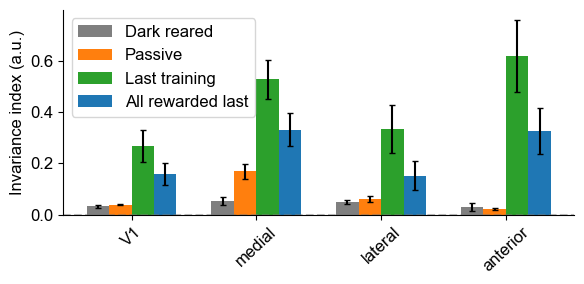

In [10]:
from scipy.stats import sem

# Compute SEM for each quantity per area
areas_order = ["V1", "medial", "lateral", "anterior"]

# Passive and dark_inv SEMs (groupby mouse, per area)
passive_sem = normal.groupby("area").mean(numeric_only=True).reindex(areas_order)["pair_invariance"].values
passive_err = normal.groupby("area").apply(lambda x: sem(x["pair_invariance"])).reindex(areas_order).values

dark_df = grouped.query("Rearing == 'Dark reared' & layer == 2")
dark_inv = dark_df.groupby("area").mean(numeric_only=True).reindex(areas_order)["pair_invariance"].values
dark_err = dark_df.groupby("area").apply(lambda x: sem(x["pair_invariance"])).reindex(areas_order).values

# last_training_inv and all_rew_last SEMs (from arrays)
last_training_err = sem(last_training_gi[:, :, 0], axis=0)
all_rew_last_err = sem(gis_all_last[:, :, 0], axis=0)

x = np.arange(len(areas_order))
width = 0.18

plt.figure(figsize=(6, 3))
plt.bar(x - 1.5*width, dark_inv, width, yerr=dark_err, label='Dark reared', color='tab:gray', capsize=2)
plt.bar(x - 0.5*width, passive, width, yerr=passive_err, label='Passive', color='tab:orange', capsize=2)
plt.bar(x + 0.5*width, last_training_inv, width, yerr=last_training_err, label='Last training', color='tab:green', capsize=2)
plt.bar(x + 1.5*width, all_rew_last, width, yerr=all_rew_last_err, label='All rewarded last', color='tab:blue', capsize=2)
plt.xticks(x, areas_order, rotation=43)
plt.ylabel('Invariance index (a.u.)')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

In [12]:
first_training_inv

array([0.1550993 , 0.33122476, 0.14382071, 0.16180446])

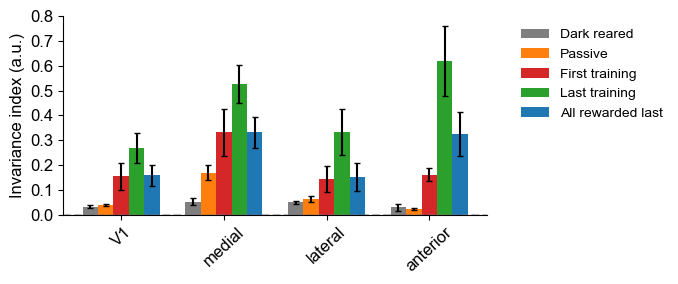

In [14]:
from scipy.stats import sem

# Compute SEM for each quantity per area
areas_order = ["V1", "medial", "lateral", "anterior"]

# Passive and dark_inv SEMs (groupby mouse, per area)
passive_sem = normal.groupby("area").mean(numeric_only=True).reindex(areas_order)["pair_invariance"].values
passive_err = normal.groupby("area").apply(lambda x: sem(x["pair_invariance"])).reindex(areas_order).values

dark_df = grouped.query("Rearing == 'Dark reared' & layer == 2")
dark_inv = dark_df.groupby("area").mean(numeric_only=True).reindex(areas_order)["pair_invariance"].values
dark_err = dark_df.groupby("area").apply(lambda x: sem(x["pair_invariance"])).reindex(areas_order).values

# last_training_inv and all_rew_last SEMs (from arrays)
last_training_err = sem(last_training_gi[:, :, 0], axis=0)
all_rew_last_err = sem(gis_all_last[:, :, 0], axis=0)

# first_training_inv and its SEM
first_training_gi, _, _ = fig2.compute_gi(first_training, 100)
first_training_inv = first_training_gi.mean(0)[:,0]
first_training_err = sem(first_training_gi[:, :, 0], axis=0)

x = np.arange(len(areas_order))
width = 0.15  # Reduce width to fit 5 bars

plt.figure(figsize=(7, 3))
plt.bar(x - 2*width, dark_inv, width, yerr=dark_err, label='Dark reared', color='tab:gray', capsize=2)
plt.bar(x - width, passive, width, yerr=passive_err, label='Passive', color='tab:orange', capsize=2)
plt.bar(x, first_training_inv, width, yerr=first_training_err, label='First training', color='tab:red', capsize=2)
plt.bar(x + width, last_training_inv, width, yerr=last_training_err, label='Last training', color='tab:green', capsize=2)
plt.bar(x + 2*width, all_rew_last, width, yerr=all_rew_last_err, label='All rewarded last', color='tab:blue', capsize=2)
plt.xticks(x, areas_order, rotation=43)
plt.ylabel('Invariance index (a.u.)')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, frameon=False)
plt.yticks(np.arange(0, .9, 0.1))
plt.tight_layout()

Text(1.5, 0.27, 'Passive')

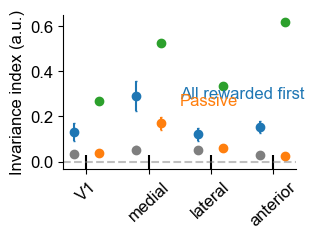

In [16]:
plt.figure(figsize=(3, 2))
for i, area in enumerate(areas):
    plt.scatter(i-0.2, all_rew[i], label='All rewarded first', color='tab:blue')
    plt.scatter(i+0.2, passive[i], label='Passive', color='tab:orange')
    plt.scatter(i-0.2, dark_inv[i], label='Dark reared', color='tab:gray')
    plt.scatter(i+0.2, last_training_inv[i], label='Last training', color='tab:green')
    plt.scatter(i, 0, color='black', marker='|', s=100)
    plt.errorbar(i-0.2, all_rew[i], yerr=sem(gis_all_first[:,i,0]), fmt='o', capsize=1, markersize=1, color='tab:blue')
    plt.errorbar(i+0.2, passive[i], yerr=sem(normal.loc[normal["area"]==area].groupby("mouse").mean(numeric_only=True)["pair_invariance"]), fmt='o', capsize=1, markersize=1, color='tab:orange')
    plt.errorbar(i-0.2, dark_inv[i], yerr=sem(dark.loc[dark["area"]==area].groupby("mouse").mean(numeric_only=True)["pair_invariance"]), fmt='o', capsize=1, markersize=1, color='tab:gray')
plt.xticks(np.arange(4), areas, rotation=43);
plt.ylabel('Invariance index (a.u.)')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.text(1.5, 0.3, 'All rewarded first', ha='left', va='center', color='tab:blue')
plt.text(1.5, 0.27, 'Passive', ha='left', va='center', color='tab:orange')